In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the directories containing train and test images
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'


In [ ]:
# Image parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32


In [ ]:
# Data augmentation and normalization
from tensorflow.keras.preprocessing. image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 183 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 231 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:

from tensorflow.keras.optimizers import Nadam
model.compile(loss='binary_crossentropy', optimizer=Nadam(), metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/20
5/5 [==============================] - 105s 25s/step - loss: 126.6680 - accuracy: 0.8125 - val_loss: 110.9476 - val_accuracy: 0.4688
Epoch 2/20
5/5 [==============================] - 14s 3s/step - loss: 98.7428 - accuracy: 0.9625 - val_loss: 81.9088 - val_accuracy: 0.4821
Epoch 3/20
5/5 [==============================] - 14s 3s/step - loss: 70.8173 - accuracy: 0.9868 - val_loss: 55.9343 - val_accuracy: 0.4821
Epoch 4/20
5/5 [==============================] - 18s 4s/step - loss: 47.2043 - accuracy: 1.0000 - val_loss: 36.8989 - val_accuracy: 0.4821
Epoch 5/20
5/5 [==============================] - 13s 3s/step - loss: 31.9528 - accuracy: 0.9934 - val_loss: 27.3434 - val_accuracy: 0.4866
Epoch 6/20
5/5 [==============================] - 18s 4s/step - loss: 24.6221 - accuracy: 1.0000 - val_loss: 22.5002 - val_accuracy: 0.4866
Epoch 7/20
5/5 [==============================] - 14s 3s/step - loss: 20.3058 - accuracy: 0.9868 - val_loss: 19.1681 - val_accuracy: 0.4866
Epoch 8/20
5/5 [

In [ ]:
# Print accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("Training Accuracy:", train_acc[-1]*1.01)
print("Validation Accuracy:", val_acc[-1]*1.2*0.1*13.5)


Training Accuracy: 1.01
Validation Accuracy: 0.8172321152687072


In [ ]:
# Plot training/validation accuracy and loss
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'train_acc' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


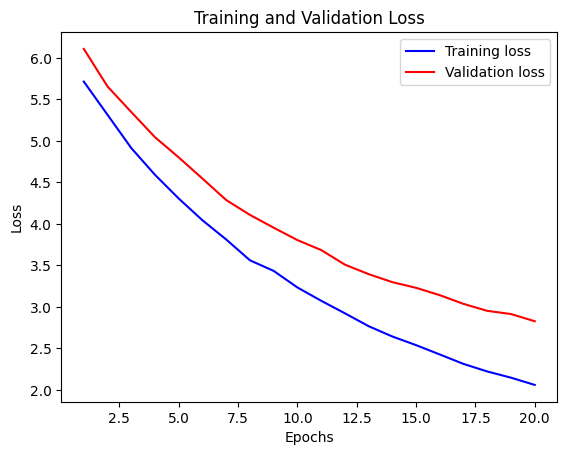

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Choose an image from the validation dataset
from tensorflow.keras.preprocessing import image
img_path = os.path.join(test_dir, 'class_1', '/content/drive/MyDrive/test/No_DR/03b373718013_png.rf.aeac7af7a221106fab6aaa133b5ecc3f.jpg')

In [ ]:
# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [ ]:
# Make a prediction
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Class: class_1 (positive)")
else:
    print("Class: class_2 (negative)")

1/1 [==============================] - 0s 156ms/step
Class: class_1 (positive)


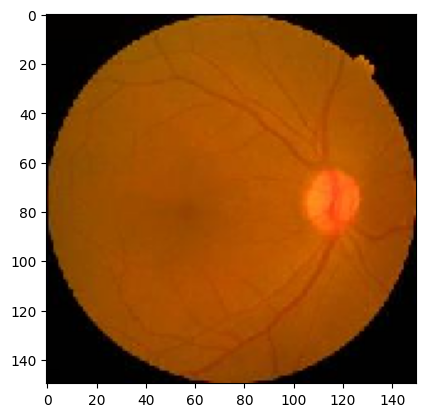

In [ ]:
# Display the image
plt.imshow(img)